## **Name:** Catherine Lennon #
## **Class:** CS7267 Machine Learning #
## **Term:** Spring 2024 #
## **Assignment 1** #


In [20]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# LOAD THE HOUSING DATA
def load_housing_data():
    dubai = Path("/Users/catherinelennon/Downloads/dubai_apt.csv")

    # CHECK TO ENSURE THE FILE EXISTS
    if not dubai.is_file():
        raise FileNotFoundError(f"File not found: {dubai}")

    return pd.read_csv(dubai)

# SET THE 'HOUSING' VARIABLE TO THE DATASET
housing = load_housing_data()

# SHOW THE DATA
housing.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,'Palm Jumeirah',25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,'Palm Jumeirah',25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,'Jumeirah Lake Towers',25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,'Culture Village',25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,'Palm Jumeirah',25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


# Data Exploration

In [21]:
# EXPLORATION - LOOK AT THE VALUE COUNTS FOR THE NEIGHBORHOOD COLUMN
housing["neighborhood"].value_counts()

'Downtown Dubai'                       302
'Dubai Marina'                         288
'Jumeirah Village Circle'              200
'Palm Jumeirah'                        178
'Jumeirah Beach Residence'             116
'Business Bay'                          97
'Jumeirah Lake Towers'                  70
'Dubai Hills Estate'                    53
'The Views'                             47
Jumeirah                                39
'Dubai Creek Harbour (The Lagoons)'     38
'Mohammed Bin Rashid City'              31
DIFC                                    31
Greens                                  30
'Dubai Harbour'                         30
'Motor City'                            27
'Town Square'                           27
'Dubai Sports City'                     25
'Al Furjan'                             23
'DAMAC Hills'                           21
'Old Town'                              17
Meydan                                  17
'City Walk'                             14
'Umm Suqeim

In [22]:
# FIND THE MIN AND MAX VALUES FOR THE TARGET VARIABLE 'PRICE'
print(housing["price"].max())
print(housing["price"].min())

35000000
220000


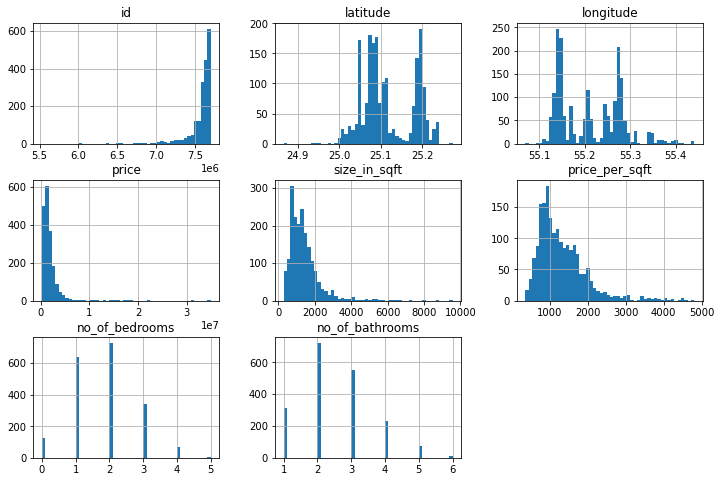

In [23]:
# GENERATE HISTOGRAMS FOR QUANTITATIVE VARIABLES
housing.hist(bins=50, figsize=(12, 8))
plt.show()

#### ✅ CHECKMARK - As shown in Figure 2-11, use the Dubai dataset and create a geographical scatterplot.

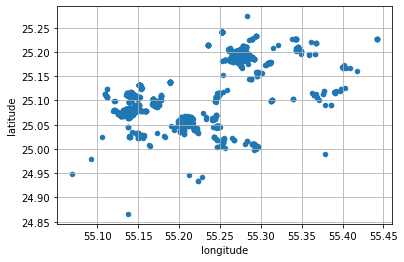

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

In [25]:
# GENERATE CORRELATION MATRIX
corr_matrix = housing.corr()

#### ✅ CHECKMARK - Look for correlation. As shown in Figure 2-14, use the numerical attributes of the Dubai dataset and show the correlations among them.

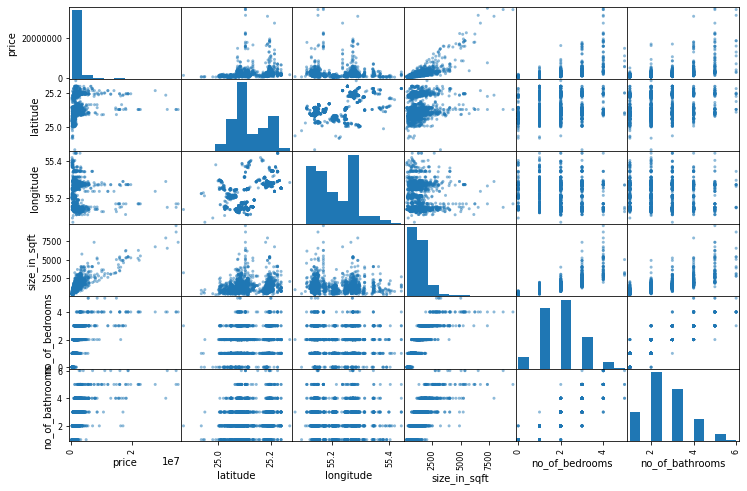

In [26]:
attributes = ["price", "latitude", "longitude", "size_in_sqft",	"no_of_bedrooms",	"no_of_bathrooms"]
scatter_matrix(housing[attributes], figsize=(12, 8)) 

plt.show()

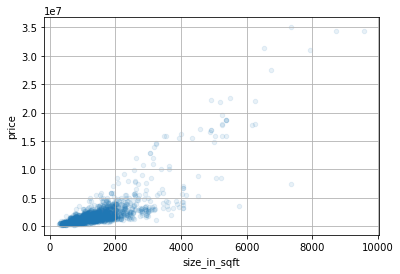

In [27]:
# IDENTIFY THE MOST PROMISING CORRELATION
housing.plot(kind="scatter", x="size_in_sqft", y="price", alpha=0.1, grid=True)
plt.show()

#### ✅ CHECKMARK - Print the correlation matrix as shown on page 67.

In [28]:
# CREATE ADDITIONAL VARIABLE FOR BEDROOMS PER BATHROOM
housing["bedrooms_per_bathroom"] = housing["no_of_bedrooms"]/housing["no_of_bathrooms"]

# CHECKMARK - Print the correlation matrix as shown on page 67.
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price                    1.000000
size_in_sqft             0.808595
price_per_sqft           0.705538
no_of_bedrooms           0.514151
no_of_bathrooms          0.502263
private_pool             0.325857
latitude                 0.206775
bedrooms_per_bathroom    0.158321
concierge                0.113217
maid_room                0.109675
private_gym              0.089794
view_of_water            0.088400
private_jacuzzi          0.073879
private_garden           0.049032
unfurnished              0.029904
built_in_wardrobes       0.026963
maid_service             0.019678
central_ac               0.016365
view_of_landmark         0.015263
covered_parking          0.011251
balcony                  0.006558
walk_in_closet          -0.003760
shared_spa              -0.003985
longitude               -0.015395
kitchen_appliances      -0.021120
study                   -0.023678
id                      -0.035908
shared_gym              -0.058010
barbecue_area           -0.079268
shared_pool   

# Prepare the Data for the Model

#### ✅ CHECKMARK - Drop the column price_per_sqft from the dataset and show (.info()).

In [29]:
# CHECK TO SEE WHETHER PRICE_PER_SQFT EXISTS
if 'price_per_sqft' in housing.columns:
    housing = housing.drop("price_per_sqft", axis=1)
else:
    print("'price_per_sqft' column not found in strat_train_set.")
    housing = housing.copy()

# COPY PRICE VARIABLE TO LABELS SET
housing_labels = housing["price"].copy()

# DISPLAY INFO
print(housing.info())
print(housing_labels.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1905 non-null   int64  
 1   neighborhood           1905 non-null   object 
 2   latitude               1905 non-null   float64
 3   longitude              1905 non-null   float64
 4   price                  1905 non-null   int64  
 5   size_in_sqft           1905 non-null   int64  
 6   no_of_bedrooms         1905 non-null   int64  
 7   no_of_bathrooms        1905 non-null   int64  
 8   quality                1905 non-null   object 
 9   maid_room              1905 non-null   bool   
 10  unfurnished            1905 non-null   bool   
 11  balcony                1905 non-null   bool   
 12  barbecue_area          1905 non-null   bool   
 13  built_in_wardrobes     1905 non-null   bool   
 14  central_ac             1905 non-null   bool   
 15  chil

#### ✅ CHECKMARK - Prepare the datasets for training and testing (test_size=0.2 and random_state=42).

In [30]:
# Separate features and target variable
y = housing['price']  
X = housing.drop('price', axis=1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pipeline Construction

#### ✅ CHECKMARK - Use at least StandardScaler for the numerical attributes and OneHotEncoder or OridinalEncoder for categorical attributes. Show your code for this Transformation pipeline.


In [31]:
# ----- PIPELINE CONSTRUCTION

# DEFINE NUMERICAL AND CATEGORICAL COLUMNS
numerical_cols = ['latitude', 'longitude', 'size_in_sqft', 'no_of_bedrooms', 'no_of_bathrooms'] 
categorical_cols_one_hot = ['neighborhood'] 
categorical_cols_ordinal = ['quality']  
other_cols = ['id', 'maid_room', 'unfurnished', 'balcony', 'barbecue_area', 'built_in_wardrobes', 'central_ac', 'childrens_play_area', 'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances', 'lobby_in_building', 'maid_service', 'networked', 'pets_allowed', 'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool', 'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study', 'vastu_compliant', 'view_of_landmark', 'view_of_water', 'walk_in_closet'] 

# CREATE TRANSFORMATIONS FOR EACH TYPE
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline_one_hot = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

categorical_pipeline_ordinal = Pipeline([
    ('ordinal', OrdinalEncoder())
])

# COMBINE TRANSFORMERS
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat_one_hot', categorical_pipeline_one_hot, categorical_cols_one_hot),
    ('cat_ordinal', categorical_pipeline_ordinal, categorical_cols_ordinal),
 #   ('drop_cols', DropColumns(['price_per_sqft']), ['price_per_sqft']),
    ('pass', 'passthrough', other_cols)
])

# # FINAL PIPELINE
# full_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('linear_regression', LinearRegression())
# ])

# # APPLY PIPELINE TO HOUSING DATASET
# housing_prepared = preprocessor.fit_transform(housing)

#### ✅ CHECKMARK - Train your model (.fit()) and show an example predictions and ground truth values as shown on the page 88.

In [32]:
lin_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('linear_regression', LinearRegression())
])

# FIT PIPELINE TO TRAINING DATA
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'size_in_sqft',
                                                   'no_of_bedrooms',
                                                   'no_of_bathrooms']),
                                                 ('cat_one_hot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['neighborhood']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('ordinal

# Fit the Model

#### ✅ CHECKMARK - Train your model (.fit()) and ✅ show an example predictions and ground truth values as shown on the page 88.

In [33]:
# CREATE PREDICTIONS
housing_predictions = lin_reg.predict(X_test)
lin_reg.predict(X_test)

# PRINT THE RESULT
print('Housing Predictions: '+ str(housing_predictions[:5].round(-2))) # -2 = rounded to the nearest hundred array([243700., 372400., 128800., 94400., 328300.])
print('Housing Actual: ' + str(housing_labels.iloc[:5].values))


Housing Predictions: [ 405100.  420600. -688100. 1124000. 2934400.]
Housing Actual: [2700000 2850000 1150000 2850000 1729200]


#### ✅ CHECKMARK - You will use two evaluation metrics: RMSE and the coefficient of determination (R^2, refer to sklearn.metrics.r2_score). Show your results.

In [34]:
# CALCULATE MEAN SQUARED ERROR
lin_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Linear Regression RMSE: {lin_rmse}")

# CALCULATE R-SQUARED
r_squared = lin_reg.score(X_test, y_test)
print(f"Coefficient of Determination (R²) on Test Set: {r_squared}")


Linear Regression RMSE: 1418197.859999327
Coefficient of Determination (R²) on Test Set: 0.7495071472206976


#### ✅ CHECKMARK - You can further improve your system using ensemble models or any other models and fine-tuning. Show your approaches to any improvements.

### ***LASSO:*** LASSO stands for Least Absolute Shrinkage and Selection Operato and is a regression analysis method for both variable selection and regularization. LASSO can both identify important features and discard irrelevant ones, which was my goal here. Unfortunately, it did not result in a meaningfully lower error or R-squared, even after using Grid Search to identify the best alpha.

In [35]:
# CREATE LASSO PIPELINE
lasso_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=100, random_state=42))  
])

# FIT THE LASSO MODEL
lasso_reg.fit(X_train, y_train)

# CREATE PREDICTIONS
y_pred_lasso = lasso_reg.predict(X_test)

# LASSO RMSE 
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
print(f"Lasso Regression RMSE: {lasso_rmse}")

# LASSO R-SQUARED
r_squared_lasso = lasso_reg.score(X_test, y_test)
print(f"Coefficient of Determination (R²) with Lasso on Test Set: {r_squared_lasso}")



Lasso Regression RMSE: 1418197.859999327
Coefficient of Determination (R²) with Lasso on Test Set: 0.7521260787441864


/Users/catherinelennon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.515e+15, tolerance: 1.306e+12
  model = cd_fast.enet_coordinate_descent(


In [36]:
# GRID SEARCH TO IDENTIFY BEST ALPHA
param_grid = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best alpha:", grid_search.best_params_)
print("Best cross-validation score (RMSE):", np.sqrt(-grid_search.best_score_))

# IDENTIFY BEST MODEL AND USE IT
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_r_squared = best_model.score(X_test, y_test)
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r_squared}")

/Users/catherinelennon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.127e+15, tolerance: 1.042e+12
  model = cd_fast.enet_coordinate_descent(


/Users/catherinelennon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.262e+15, tolerance: 1.212e+12
  model = cd_fast.enet_coordinate_descent(
/Users/catherinelennon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+15, tolerance: 9.438e+11
  model = cd_fast.enet_coordinate_descent(
/Users/catherinelennon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Best alpha: {'lasso__alpha': 100}
Best cross-validation score (RMSE): 1510199.0083692225
Test RMSE: 1418197.859999327
Test R²: 0.7521260787441864


/Users/catherinelennon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+15, tolerance: 1.059e+12
  model = cd_fast.enet_coordinate_descent(
/Users/catherinelennon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.515e+15, tolerance: 1.306e+12
  model = cd_fast.enet_coordinate_descent(


### ***Random Forest Regression:*** Given LASSO did not improve my results, I decided to try a Random Forest Regressor, which meaningfully improved my results. The random forest regressor constructs multiple decision trees during training and outputs the average decision of the individual trees. 

In [37]:
# CREATE RANDOM FOREST PIPELINE
random_forest_reg = RandomForestRegressor(random_state=42)
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is your existing preprocessing pipeline
    ('rf', RandomForestRegressor(random_state=42))
])

# FIT THE MODEL
rf_pipeline.fit(X_train, y_train)

# CREATE PREDICTIONS
y_pred_rf = rf_pipeline.predict(X_test)

# CALCULATE RMSE AND R-SQUARED
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r_squared = rf_pipeline.score(X_test, y_test)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R²: {rf_r_squared}")

# HYPERPARAMETER TUNING
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_features': ['auto', 'sqrt'],
    'rf__max_depth': [10, 20, 30]
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)

Random Forest RMSE: 982110.6633413924
Random Forest R²: 0.881128419061192
Best parameters: {'rf__max_depth': 20, 'rf__max_features': 'auto', 'rf__n_estimators': 200}


In [38]:
# CREATE NEW RANDOM FOREST PIPELINE
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=300, max_features='auto', max_depth=10, random_state=42))
])

# FIT THE MODEL
rf_pipeline.fit(X_train, y_train)

# USE GRID RF TO GET BEST ESTIMATORS
best_rf_pipeline = grid_search_rf.best_estimator_

best_rf_pipeline.fit(X_train, y_train)

# CREATE PREDICTIONS
y_pred_rf = best_rf_pipeline.predict(X_test)

# CALCULATE RMSE AND R-SQUARED FOR RANDOM FOREST
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r_squared = best_rf_pipeline.score(X_test, y_test)

print(f"Random Forest RMSE with Best Parameters: {rf_rmse}")
print(f"Random Forest R² with Best Parameters: {rf_r_squared}")

Random Forest RMSE with Best Parameters: 957670.8797682557
Random Forest R² with Best Parameters: 0.8869710353368904
